In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import re # regex

In [2]:
bom = pd.read_csv("../../../../data/bom.movie_gross.csv")
bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
rt_reviews = pd.read_csv("../../../../data/rt.reviews.tsv", encoding='latin-1',sep='\t')
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [4]:
rt_movie_info = pd.read_csv("../../../../data/rt.movie_info.tsv", sep='\t')
rt_movie_info.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [5]:
tmdb = pd.read_csv("../../../../data/tmdb.movies.csv")
tmdb.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [6]:
tn_budget = pd.read_csv("../../../../data/tn.movie_budgets.csv")
tn_budget.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


## bom.movie_gross

In [7]:
bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [8]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
bom.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

### How to handle the nulls?

## rt.reviews.tsv

In [10]:
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [11]:
# Coercion is the implicit conversion of an instance of one type to another
# during an operation which involves two arguments of the same type.
rt_reviews['year'] = pd.to_datetime(rt_reviews['date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date,year
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",2018
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",2018
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",2018
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",2017
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017",2017


In [12]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
 8   year        54432 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.7+ MB


# WORKING ON RATINGS

In [13]:
rt_reviews['rating'].isna().sum()

13517

In [14]:
rt_reviews['rating'].value_counts()

3/5       4327
4/5       3672
3/4       3577
2/5       3160
2/4       2712
          ... 
4.1/10       1
0/6          1
2.3/5        1
4.1          1
8.4          1
Name: rating, Length: 186, dtype: int64

In [15]:
# Drop NaN from rating
rt_reviews.dropna(subset=['rating'], inplace=True)
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40915 entries, 0 to 54431
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          40915 non-null  int64 
 1   review      35379 non-null  object
 2   rating      40915 non-null  object
 3   fresh       40915 non-null  object
 4   critic      38935 non-null  object
 5   top_critic  40915 non-null  int64 
 6   publisher   40688 non-null  object
 7   date        40915 non-null  object
 8   year        40915 non-null  object
dtypes: int64(2), object(7)
memory usage: 3.1+ MB


In [16]:
# Create a filter that states whether a "/" exists or not
filt = rt_reviews['rating'].str.contains('/', na=False)
filt.head()

0      True
6     False
7      True
11    False
12     True
Name: rating, dtype: bool

In [17]:
# Utilize the filter to locate only rows where TRUE is returned
rt_reviews["fract"] = rt_reviews.loc[filt, 'rating']

In [18]:
# split fraction into numerator and denominator
rt_reviews["fract"] = rt_reviews["fract"].str.split("/")
rt_reviews.head(2)

,id,review,rating,fresh,critic,top_critic,publisher,date,year,fract
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",2018,"[3, 5]"
6,3,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013",2013,NaN


In [19]:
# drop NaN from fract
rt_reviews.dropna(subset=["fract"], inplace=True)
rt_reviews.head(4)

,id,review,rating,fresh,critic,top_critic,publisher,date,year,fract
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",2018,"[3, 5]"
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2013,"[2, 5]"
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",2013,"[2, 4]"
14,3,For those who like their Cronenberg thick and ...,3/4,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012",2012,"[3, 4]"


In [20]:
# Reset index of rt_reviews
rt_reviews.reset_index(inplace=True)
rt_reviews.head(4)

,index,id,review,rating,fresh,critic,top_critic,publisher,date,year,fract
0,0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",2018,"[3, 5]"
1,7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2013,"[2, 5]"
2,12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",2013,"[2, 4]"
3,14,3,For those who like their Cronenberg thick and ...,3/4,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012",2012,"[3, 4]"


In [21]:
rt_reviews["rating_num"] = 0
rt_reviews["rating_den"] = 0
rt_reviews.head(2)

,index,id,review,rating,fresh,critic,top_critic,publisher,date,year,fract,rating_num,rating_den
0,0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",2018,"[3, 5]",0,0
1,7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2013,"[2, 5]",0,0


In [22]:
for index,value in rt_reviews.iterrows():
    rt_reviews["rating_num"][index] = value['fract'][0]
    rt_reviews["rating_den"][index] = value['fract'][1]
rt_reviews.head(5)

<ipython-input-22-4e1d5eda987e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_reviews["rating_num"][index] = value['fract'][0]
<ipython-input-22-4e1d5eda987e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rt_reviews["rating_den"][index] = value['fract'][1]
C:\Users\dtaher\Anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, val

,index,id,review,rating,fresh,critic,top_critic,publisher,date,year,fract,rating_num,rating_den
0,0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",2018,"[3, 5]",3,5
1,7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2013,"[2, 5]",2,5
2,12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",2013,"[2, 4]",2,4
3,14,3,For those who like their Cronenberg thick and ...,3/4,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012",2012,"[3, 4]",3,4
4,15,3,For better or worse - often both - Cosmopolis ...,3/5,fresh,Adam Ross,0,The Aristocrat,"September 27, 2012",2012,"[3, 5]",3,5


In [23]:
# checking data types of new columns... need to convert to float
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33696 entries, 0 to 33695
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       33696 non-null  int64 
 1   id          33696 non-null  int64 
 2   review      28762 non-null  object
 3   rating      33696 non-null  object
 4   fresh       33696 non-null  object
 5   critic      32026 non-null  object
 6   top_critic  33696 non-null  int64 
 7   publisher   33512 non-null  object
 8   date        33696 non-null  object
 9   year        33696 non-null  object
 10  fract       33696 non-null  object
 11  rating_num  33696 non-null  object
 12  rating_den  33696 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 3.3+ MB


In [24]:
rt_reviews["rating_num"].replace(" ", "")

0          3
1          2
2          2
3          3
4          3
        ... 
33691    1.5
33692      1
33693      2
33694    2.5
33695      3
Name: rating_num, Length: 33696, dtype: object

In [25]:
# drop row that has no denominator
rt_reviews = rt_reviews[rt_reviews["rating_num"] != "3 1"]

In [26]:
# cast rating numerators and denominators as float
rt_reviews["rating_num"] = rt_reviews["rating_num"].astype(float)
rt_reviews["rating_den"] = rt_reviews["rating_den"].astype(float)

rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33695 entries, 0 to 33695
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       33695 non-null  int64  
 1   id          33695 non-null  int64  
 2   review      28761 non-null  object 
 3   rating      33695 non-null  object 
 4   fresh       33695 non-null  object 
 5   critic      32025 non-null  object 
 6   top_critic  33695 non-null  int64  
 7   publisher   33511 non-null  object 
 8   date        33695 non-null  object 
 9   year        33695 non-null  object 
 10  fract       33695 non-null  object 
 11  rating_num  33695 non-null  float64
 12  rating_den  33695 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 3.6+ MB


In [27]:
rt_reviews["rating_den"].value_counts()

5.0     17043
4.0     13632
10.0     2960
6.0        39
2.0        13
8.0         8
Name: rating_den, dtype: int64

In [28]:
rt_reviews["rating_adj"] = (rt_reviews["rating_num"] / rt_reviews["rating_den"]) * 10
rt_reviews.head()

,index,id,review,rating,fresh,critic,top_critic,publisher,date,year,fract,rating_num,rating_den,rating_adj
0,0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",2018,"[3, 5]",3.0,5.0,6.0
1,7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2013,"[2, 5]",2.0,5.0,4.0
2,12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",2013,"[2, 4]",2.0,4.0,5.0
3,14,3,For those who like their Cronenberg thick and ...,3/4,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012",2012,"[3, 4]",3.0,4.0,7.5
4,15,3,For better or worse - often both - Cosmopolis ...,3/5,fresh,Adam Ross,0,The Aristocrat,"September 27, 2012",2012,"[3, 5]",3.0,5.0,6.0


In [29]:
over10 = rt_reviews.loc[rt_reviews["rating_adj"] > 10]
over10

,index,id,review,rating,fresh,critic,top_critic,publisher,date,year,fract,rating_num,rating_den,rating_adj
528,882,23,"On the plus side of the ledger, Russell enable...",2.1/2,fresh,Leonard Maltin,0,leonardmaltin.com,"December 13, 2013",2013,"[2.1, 2]",2.1,2.0,10.5
1578,2523,77,"...it's an old-fashioned star vehicle, fashion...",2.1/2,fresh,Leonard Maltin,1,indieWire,"July 8, 2011",2011,"[2.1, 2]",2.1,2.0,10.5
3339,5217,196,NaN,5/4,fresh,NaN,0,Hollywood.com,"April 23, 2005",2005,"[5, 4]",5.0,4.0,12.5
6596,10535,401,Spielberg marshals all his formidable storytel...,5.5/5,fresh,Marjorie Baumgarten,0,Austin Chronicle,"January 1, 2000",2000,"[5.5, 5]",5.5,5.0,11.0
7834,12537,486,One would presume that a behind-the-scenes loo...,2.1/2,rotten,Leonard Maltin,0,leonardmaltin.com,"April 11, 2012",2012,"[2.1, 2]",2.1,2.0,10.5
10882,17215,689,Anderson succeeds in creating a world all its ...,2.1/2,rotten,Leonard Maltin,0,leonardmaltin.com,"December 11, 2014",2014,"[2.1, 2]",2.1,2.0,10.5
12584,20129,809,Vertigo stands as one of the thrill master's m...,5.5/5,fresh,Marjorie Baumgarten,0,Austin Chronicle,"January 1, 2000",2000,"[5.5, 5]",5.5,5.0,11.0
18540,29754,1175,NaN,5.5/5,fresh,Marjorie Baumgarten,0,Austin Chronicle,"January 1, 2000",2000,"[5.5, 5]",5.5,5.0,11.0
20971,33755,1321,"'Get On Up' has Chadwick Boseman going for it,...",2.1/2,fresh,Leonard Maltin,0,leonardmaltin.com,"July 31, 2014",2014,"[2.1, 2]",2.1,2.0,10.5
22249,35830,1393,...the kind of film that Menahem Golan and Yor...,3/2,rotten,John Noonan,0,FILMINK (Australia),"November 10, 2016",2016,"[3, 2]",3.0,2.0,15.0


### Note that all of the rows with adjusted rating of over 10 have unusable "rating" values...
for instance, "5.5/5" or "2.1/2"

I will drop these in the next cells

In [30]:
# create list for review id where rating is over 10
over10_id = []
for i in over10['id']:
    over10_id.append(i)
over10_id

[23,
 77,
 196,
 401,
 486,
 689,
 809,
 1175,
 1321,
 1393,
 1424,
 1424,
 1494,
 1574,
 1941]

In [31]:
# locate everything but ~rt_reviews['id'] if id is in the list of over10_id
rt_reviews = rt_reviews[~rt_reviews['id'].isin(over10_id)]
rt_reviews.loc[rt_reviews["rating_adj"] > 10]

,index,id,review,rating,fresh,critic,top_critic,publisher,date,year,fract,rating_num,rating_den,rating_adj


In [32]:
# drop unused rating columns
rt_reviews = rt_reviews.drop(columns=["rating", "fract", "rating_num", "rating_den"])

In [33]:
rt_reviews.drop(columns='index').reset_index(inplace=False)

,index,id,review,fresh,critic,top_critic,publisher,date,year,rating_adj
0,0,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",2018,6.0
1,1,3,Cronenberg is not a director to be daunted by ...,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2013,4.0
2,2,3,Robert Pattinson works mighty hard to make Cos...,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",2013,5.0
3,3,3,For those who like their Cronenberg thick and ...,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012",2012,7.5
4,4,3,For better or worse - often both - Cosmopolis ...,fresh,Adam Ross,0,The Aristocrat,"September 27, 2012",2012,6.0
...,...,...,...,...,...,...,...,...,...,...
32740,33691,2000,Dawdles and drags when it should pop; it doesn...,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002",2002,3.0
32741,33692,2000,NaN,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005",2005,2.0
32742,33693,2000,NaN,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005",2005,4.0
32743,33694,2000,NaN,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003",2003,5.0


In [34]:
cols_to_remove = ["index", "level_0"]
cols_to_keep = [col for col in rt_reviews.columns if col not in cols_to_remove]
rt_reviews = rt_reviews[cols_to_keep]
rt_reviews

,id,review,fresh,critic,top_critic,publisher,date,year,rating_adj
0,3,A distinctly gallows take on contemporary fina...,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",2018,6.0
1,3,Cronenberg is not a director to be daunted by ...,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2013,4.0
2,3,Robert Pattinson works mighty hard to make Cos...,rotten,Christian Toto,0,Big Hollywood,"January 15, 2013",2013,5.0
3,3,For those who like their Cronenberg thick and ...,fresh,Marty Mapes,0,Movie Habit,"October 20, 2012",2012,7.5
4,3,For better or worse - often both - Cosmopolis ...,fresh,Adam Ross,0,The Aristocrat,"September 27, 2012",2012,6.0
...,...,...,...,...,...,...,...,...,...
33691,2000,Dawdles and drags when it should pop; it doesn...,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002",2002,3.0
33692,2000,NaN,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005",2005,2.0
33693,2000,NaN,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005",2005,4.0
33694,2000,NaN,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003",2003,5.0


In [35]:
# One last check to ensure the range of ratings is 0-10
rt_reviews['rating_adj'].describe()

count    32745.000000
mean         6.207765
std          2.150681
min          0.000000
25%          5.000000
50%          6.250000
75%          8.000000
max         10.000000
Name: rating_adj, dtype: float64

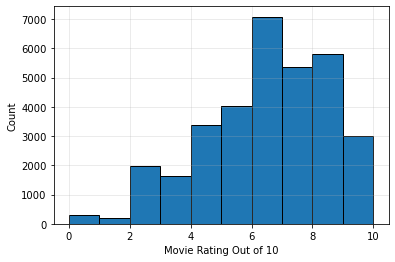

In [36]:
plt.hist(rt_reviews['rating_adj'], edgecolor='k')
plt.grid(alpha=0.3)
plt.xlabel("Movie Rating Out of 10")
plt.ylabel("Count");

# END RATINGS

## Change freshness to binary system
Fresh

    1: fresh
    
    0: rotten

In [37]:
rt_reviews['fresh'] = rt_reviews['fresh'].map({"fresh":1, "rotten":0})
rt_reviews

,id,review,fresh,critic,top_critic,publisher,date,year,rating_adj
0,3,A distinctly gallows take on contemporary fina...,1,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",2018,6.0
1,3,Cronenberg is not a director to be daunted by ...,0,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013",2013,4.0
2,3,Robert Pattinson works mighty hard to make Cos...,0,Christian Toto,0,Big Hollywood,"January 15, 2013",2013,5.0
3,3,For those who like their Cronenberg thick and ...,1,Marty Mapes,0,Movie Habit,"October 20, 2012",2012,7.5
4,3,For better or worse - often both - Cosmopolis ...,1,Adam Ross,0,The Aristocrat,"September 27, 2012",2012,6.0
...,...,...,...,...,...,...,...,...,...
33691,2000,Dawdles and drags when it should pop; it doesn...,0,Manohla Dargis,1,Los Angeles Times,"September 26, 2002",2002,3.0
33692,2000,NaN,0,Michael Szymanski,0,Zap2it.com,"September 21, 2005",2005,2.0
33693,2000,NaN,0,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005",2005,4.0
33694,2000,NaN,0,Christopher Null,0,Filmcritic.com,"September 7, 2003",2003,5.0


In [38]:
pd.pivot_table(rt_reviews[['id','rating_adj', 'fresh']],
               index="id", columns=["fresh"], aggfunc='mean')

rating_adj          
fresh          0         1
id                        
3       4.027027  7.406250
5       5.050000  7.553571
6       4.125000  7.086957
8       5.250000  7.720000
10      4.357143  7.239583
...          ...       ...
1996    4.476562  7.075000
1997    3.562500  6.500000
1998         NaN  6.000000
1999    3.791667  7.125000
2000    4.288462  6.500000

[1060 rows x 2 columns]

In [39]:
# Creating a dataframe to merge with
movie_ratings = pd.DataFrame({"avg_rating": rt_reviews.groupby("id")['rating_adj'].mean(),
                             "freshrot_ratio": rt_reviews.groupby("id")['fresh'].mean()}
                            ).reset_index()
movie_ratings

,id,avg_rating,freshrot_ratio
0,3,6.061828,0.602151
1,5,6.894737,0.736842
2,6,5.871795,0.589744
3,8,7.014286,0.714286
4,10,5.687500,0.461538
...,...,...,...
1055,1996,6.171196,0.652174
1056,1997,4.541667,0.333333
1057,1998,6.000000,1.000000
1058,1999,5.696429,0.571429


# Investigating Freshness

**per rottentomatoes.com/about:**

The Tomatometer score represents the percentage of professional critic reviews that are positive for a given film or television show. A Tomatometer score is calculated for a movie or TV show after it receives at least five reviews.

Fresh red tomato
When at least 60% of reviews for a movie or TV show are positive, a red tomato is displayed to indicate its Fresh status.

Green splat tomato
When less than 60% of reviews for a movie or TV show are positive, a green splat is displayed to indicate its Rotten status.

In [40]:
rt_reviews['fresh'].value_counts()

1    19780
0    12965
Name: fresh, dtype: int64

In [41]:
# create a fresh movie df for only fresh movies
rt_fresh = rt_reviews[rt_reviews["fresh"] == 1]
# rt_fresh.drop(columns='index').reset_index(inplace=False)

In [42]:
# Check how many unique values appear in "id" column
rt_fresh["id"].nunique()

980

In [43]:
# Get average rating by movie id
rt_fresh.groupby(by=["year"]).agg(['mean', 'count'])['rating_adj']

,mean,count
year,,
1800,10.000000,1
1951,7.500000,2
1953,10.000000,1
1965,7.500000,1
1969,7.500000,1
1973,8.000000,1
1981,10.000000,1
1986,7.000000,1
1988,7.500000,1


# rt_movie_info table

In [44]:
# Get only movies from movie info that are present in rt_fresh df
rt_movie_info = rt_movie_info.loc[rt_movie_info['id'].isin(movie_ratings['id'])]
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1060 entries, 1 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1060 non-null   int64 
 1   synopsis      1044 non-null   object
 2   rating        1059 non-null   object
 3   genre         1059 non-null   object
 4   director      948 non-null    object
 5   writer        839 non-null    object
 6   theater_date  949 non-null    object
 7   dvd_date      949 non-null    object
 8   currency      290 non-null    object
 9   box_office    290 non-null    object
 10  runtime       1049 non-null   object
 11  studio        402 non-null    object
dtypes: int64(1), object(11)
memory usage: 107.7+ KB


In [45]:
df = pd.merge(movie_ratings, rt_movie_info, on="id", how="left")
df

,id,avg_rating,freshrot_ratio,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,6.061828,0.602151,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
1,5,6.894737,0.736842,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
2,6,5.871795,0.589744,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
3,8,7.014286,0.714286,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
4,10,5.687500,0.461538,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,1996,6.171196,0.652174,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1056,1997,4.541667,0.333333,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1057,1998,6.000000,1.000000,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1058,1999,5.696429,0.571429,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [46]:
rt_movie_info.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


## Began investigating SQL DB to work with movies with names in hopes to combine them with Morgan's budget table... Could then do analysis on profit vs genre